## Convolutional Neural Network

### Step 1: Load Dataset

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

C:\Users\playe\.conda\envs\kagleML\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

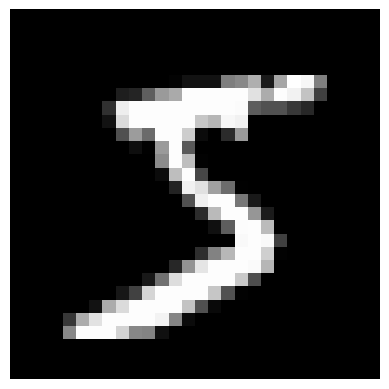

In [47]:
import matplotlib.pyplot as plt

img, label = train_dataset[0]
print(img)
print(img.shape)
print(label)

plt.figure()
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

### Step 2: Make Dataset Iterable

In [36]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### Step 3: Create Model Class

In [68]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2,)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10) 

    def forward(self, x):
        
        # input: x, size (num_img, 28, 28)
        
        # Convolution 1
        # O = (28 - 5 + 2*2)/ 1 + 1 = 28
        # output: size (num_img, 16, 28, 28)
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        # O = 28 / 2 = 14
        # output: size (num_img, 16, 14, 14)
        out = self.maxpool1(out)

        # Convolution 2
        # O = (14 - 5 + 2*2)/ 1 + 1 = 14
        # output: size (num_img, 32, 14, 14)
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        # O = 14 / 2 = 7
        # output: size (num_img, 32, 7, 7)
        out = self.maxpool2(out)

        # Resize
        # Original size: (num_img, 32, 7, 7)
        # out.size(0): num_img
        # New out size: (num_img, 32*7*7)
        out = out.view(out.size(0), -1)
        #print("size",out.size(0))
        #print("size out",out.size())
        #print("out",out.view(out.size(0),-1))

        # Linear function (readout)
        # output: size (num_img, 10)
        out = self.fc1(out)
        #print("out  fcl",out.size())
        
        
        

        return out

### Step 4: Instantiate Model Class

In [69]:
model = CNNModel()

### Step 5: Instantiate Loss Class

In [70]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class

In [71]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(1), lr=learning_rate)

### Step 7: Train Model

In [72]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)
                #print(outputs.size())
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.3891366720199585. Accuracy: 87.44999694824219
Iteration: 1000. Loss: 0.3916802704334259. Accuracy: 91.91999816894531
Iteration: 1500. Loss: 0.14091503620147705. Accuracy: 94.30000305175781
Iteration: 2000. Loss: 0.1942174881696701. Accuracy: 95.44999694824219
Iteration: 2500. Loss: 0.08889119327068329. Accuracy: 96.1500015258789
Iteration: 3000. Loss: 0.22478388249874115. Accuracy: 96.66000366210938
